In [55]:
def mod_display(filegrb,feature,style="gray",index=0,crop=True,scale=True,domain=True,colorbar=True):
    """
    filegrb: a string containing the filepath to the file that ends in .grb or .grb2
    feature: a string containing the feature to be displayed
    style: a string containing the cmap coloration
    index: an integer used to denote several versions of the feature variable
    crop: a boolean variable used to show the cropped image
    scale: a boolean variable used to scale the data down between 0 and 1
    """
    if (crop == True):
        import pygrib
        import matplotlib.pyplot as plt
        import numpy as np
        lat_bot = 31.0
        lat_top = 41.0
        lon_left = -102.0
        lon_right = -82.0
        grbs = pygrib.open(filegrb)
        grb = grbs.select(name=feature)[index]
        grbs.close()
        data,lats,lons = grb.data(lat1=lat_bot,lat2=lat_top,lon1=lon_left,lon2=lon_right)
        if scale==True:
            data = data+abs(data.min())
            data = (data/data.max()+1)*10
        print(data.min())
        plt.scatter(x=lons,y=lats,s=data,c=data,marker=",",cmap=style)
        plt.title(feature + " of Domain")
        plt.xlabel("Longitude W")
        plt.ylabel("Latitude N")
        if colorbar==True:
            plt.colorbar()
    else:
        import pygrib
        import matplotlib.pyplot as plt
        import numpy as np
        grbs = pygrib.open(filegrb)
        grb = grbs.select(name=feature)[index]
        grbs.close()
        data = grb.values
        if scale==True:
            data = (data/data.max())
        if domain==True:
            lats,lons = grb.latlons()
            data[lats < 31.0] = np.nan
            data[lats > 41.0] = np.nan
            data[lons < -102.0] = np.nan
            data[lons > -82.0] = np.nan
        plt.imshow(data,cmap=style,origin="lower")
        plt.title(feature + " of NA")
        plt.xlabel("Longitude W")
        plt.ylabel("Latitude N")
        if colorbar==True:
            plt.colorbar()

In [2]:
filegrb = "/mnt/data-weather/moddata/modgrb/namanl_218_20171228_1200_000.grb2"
feature = "Temperature"

In [ ]:
mod_display(filegrb,feature)

In [ ]:
mod_display(filegrb,feature,crop=False)

In [64]:
import pygrib
grbs = pygrib.open(filegrb)
for grb in grbs:
    print(grb)
grb=grbs.select(name="Temperature")[0]
print(grb.values.max(),grb.values.min())
grb=grbs.select(name="Soil Temperature")[0]
print(grb.values.max(),grb.values.min())
grb=grbs.select(name="Total Precipitation")[0]
print(grb.values.max(),grb.values.min())
grb=grbs.select(name="Convective precipitation (water)")[0]
print(grb.values.max(),grb.values.min())
grb=grbs.select(name="Specific humidity")[0]
print(grb.values.max(),grb.values.min())
grb=grbs.select(name="Relative humidity")[0]
print(grb.values.max(),grb.values.min())
grb=grbs.select(name="Visibility")[0]
print(grb.values.max(),grb.values.min())
grb=grbs.select(name="Visibility")[1]
print(grb.values.max(),grb.values.min())


grbs.close()

1:Pressure reduced to MSL:Pa (instant):lambert:meanSea:level 0:fcst time 0 hrs:from 201712281200
2:Derived radar reflectivity:dB (instant):lambert:hybrid:level 1:fcst time 0 hrs:from 201712281200
3:Maximum/Composite radar reflectivity:dB (instant):lambert:unknown:level 0 considered as a single layer:fcst time 0 hrs:from 201712281200
4:Visibility:m (instant):lambert:surface:level 0:fcst time 0 hrs:from 201712281200
5:Visibility:m (instant):lambert:cloudTop:level 0:fcst time 0 hrs:from 201712281200
6:Blackadar mixing length scale:m (instant):lambert:hybrid:level 1:fcst time 0 hrs:from 201712281200
7:Geopotential Height:gpm (instant):lambert:unknown:level 0:fcst time 0 hrs:from 201712281200
8:U component of wind:m s**-1 (instant):lambert:unknown:level 0:fcst time 0 hrs:from 201712281200
9:V component of wind:m s**-1 (instant):lambert:unknown:level 0:fcst time 0 hrs:from 201712281200
10:Ventilation Rate:m**2 s**-1 (instant):lambert:unknown:level 0:fcst time 0 hrs:from 201712281200
11:Wind 

110:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 32500 Pa:fcst time 0 hrs:from 201712281200
111:V component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 32500 Pa:fcst time 0 hrs:from 201712281200
112:Turbulent kinetic energy:J kg**-1 (instant):lambert:isobaricInhPa:level 32500 Pa:fcst time 0 hrs:from 201712281200
113:Geopotential Height:gpm (instant):lambert:isobaricInhPa:level 35000 Pa:fcst time 0 hrs:from 201712281200
114:Temperature:K (instant):lambert:isobaricInhPa:level 35000 Pa:fcst time 0 hrs:from 201712281200
115:Relative humidity:% (instant):lambert:isobaricInhPa:level 35000 Pa:fcst time 0 hrs:from 201712281200
116:Vertical velocity:Pa s**-1 (instant):lambert:isobaricInhPa:level 35000 Pa:fcst time 0 hrs:from 201712281200
117:Geometric vertical velocity:m s**-1 (instant):lambert:isobaricInhPa:level 35000 Pa:fcst time 0 hrs:from 201712281200
118:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 35000 Pa:fcst time 0 hrs:from 201712281

229:Vertical velocity:Pa s**-1 (instant):lambert:isobaricInhPa:level 70000 Pa:fcst time 0 hrs:from 201712281200
230:Geometric vertical velocity:m s**-1 (instant):lambert:isobaricInhPa:level 70000 Pa:fcst time 0 hrs:from 201712281200
231:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 70000 Pa:fcst time 0 hrs:from 201712281200
232:V component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 70000 Pa:fcst time 0 hrs:from 201712281200
233:Absolute vorticity:s**-1 (instant):lambert:isobaricInhPa:level 70000 Pa:fcst time 0 hrs:from 201712281200
234:Turbulent kinetic energy:J kg**-1 (instant):lambert:isobaricInhPa:level 70000 Pa:fcst time 0 hrs:from 201712281200
235:Geopotential Height:gpm (instant):lambert:isobaricInhPa:level 72500 Pa:fcst time 0 hrs:from 201712281200
236:Temperature:K (instant):lambert:isobaricInhPa:level 72500 Pa:fcst time 0 hrs:from 201712281200
237:Relative humidity:% (instant):lambert:isobaricInhPa:level 72500 Pa:fcst time 0 hrs:from 201712281200

309:Temperature:K (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201712281200
310:Relative humidity:% (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201712281200
311:Vertical velocity:Pa s**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201712281200
312:Geometric vertical velocity:m s**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201712281200
313:U component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201712281200
314:V component of wind:m s**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201712281200
315:Turbulent kinetic energy:J kg**-1 (instant):lambert:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 201712281200
316:Haines Index:Numeric (instant):lambert:surface:level 0:fcst time 0 hrs:from 201712281200
317:Geopotential Height:gpm (instant):lambert:isobaricInhPa:level 97500 Pa:fcst time 0 hrs:from 201712281200
318:Temperature:

393:Temperature:K (instant):lambert:tropopause:level 0:fcst time 0 hrs:from 201712281200
394:U component of wind:m s**-1 (instant):lambert:tropopause:level 0:fcst time 0 hrs:from 201712281200
395:V component of wind:m s**-1 (instant):lambert:tropopause:level 0:fcst time 0 hrs:from 201712281200
396:Pressure:Pa (instant):lambert:maxWind:level 0:fcst time 0 hrs:from 201712281200
397:U component of wind:m s**-1 (instant):lambert:maxWind:level 0:fcst time 0 hrs:from 201712281200
398:V component of wind:m s**-1 (instant):lambert:maxWind:level 0:fcst time 0 hrs:from 201712281200
399:Temperature:K (instant):lambert:heightAboveGround:level 80 m:fcst time 0 hrs:from 201712281200
400:Specific humidity:kg kg**-1 (instant):lambert:heightAboveGround:level 80 m:fcst time 0 hrs:from 201712281200
401:Pressure:Pa (instant):lambert:heightAboveGround:level 80 m:fcst time 0 hrs:from 201712281200
402:U component of wind:m s**-1 (instant):lambert:heightAboveGround:level 80 m:fcst time 0 hrs:from 201712281200

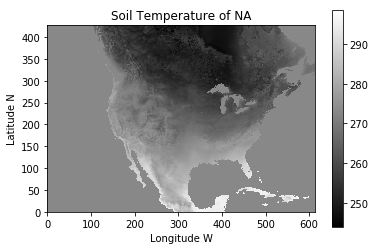

In [65]:
mod_display(filegrb,"Soil Temperature",crop=False,domain=False,colorbar=True,scale=False)

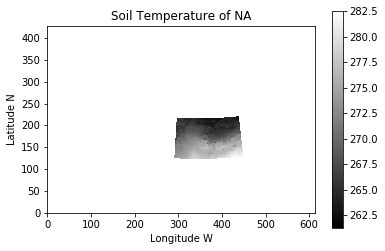

In [66]:
mod_display(filegrb,"Soil Temperature",crop=False,domain=True,colorbar=True,scale=False)

261.24


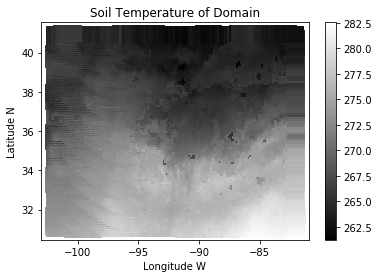

In [68]:
mod_display(filegrb,"Soil Temperature",crop=True,colorbar=True,scale=False,style='gray')

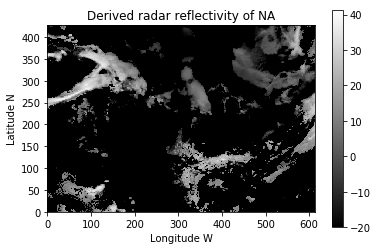

In [20]:
mod_display(filegrb,"Derived radar reflectivity",crop=False,domain=False,colorbar=True,scale=False)

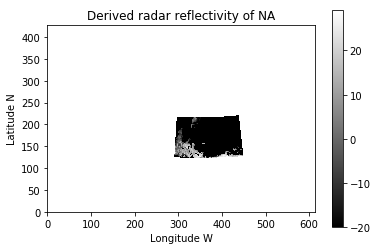

In [25]:
mod_display(filegrb,"Derived radar reflectivity",crop=False,domain=True,colorbar=True,scale=False)

10.0


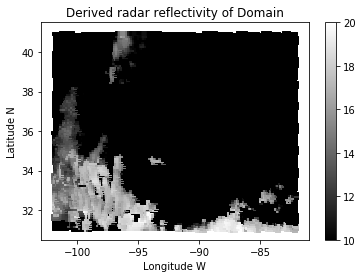

In [56]:
mod_display(filegrb,"Derived radar reflectivity",crop=True,colorbar=True,scale=True,style='gray')

In [ ]:
mod_display(filegrb,"Geopotential Height")